In [1]:
#Import relevant packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 
%matplotlib inline

Image has dimensions x = 960 and y = 540


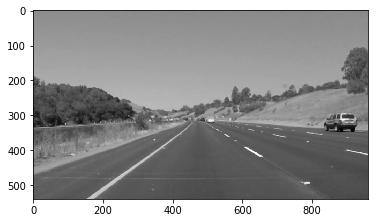

In [2]:
#Reads an image and stores it in variable image
image_list = ['solidWhiteCurve.jpg','solidWhiteRight.jpg','solidYellowCurve.jpg','solidYellowCurve2.jpg','solidYellowLeft.jpg','whiteCarLaneSwitch.jpg']
file_name ='test_images/'+image_list[2]
image = mpimg.imread(file_name)
print('Image has dimensions x = ' + str(image.shape[1]) + ' and y = ' + str(image.shape[0]))

#Converts image to gray and plots it
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

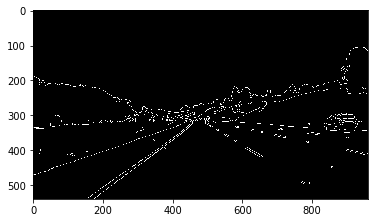

In [19]:
#Defines lower and upper treshold for Canny function
lower_treshold = 40
higher_treshold = 110

#Defines kernel size for Gaussian smoothing 
kernel_size = 7
blur_gray = cv2.GaussianBlur(gray,(kernel_size,kernel_size), 0)

#Finds edges with Canny Edge Detection
edges = cv2.Canny(blur_gray, lower_treshold, higher_treshold)

#Plots image
plt.imshow(edges,cmap='Greys_r')

In [20]:
#Create a polyfill filter

mask = np.zeros_like(edges)
ignore_mask_color = 255

#Defining four sided polygon to mask
imshape = image.shape
vertices = np.array([[(126,imshape[0]),(452, 320), (500,320), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)



In [21]:
#Define Hough Transform Parameters
rho = 2
theta = np.pi/180
threshold = 19
min_line_length = 32
max_line_gap = 15
line_image = np.copy(image)*0

#Runs Hough Transform
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)



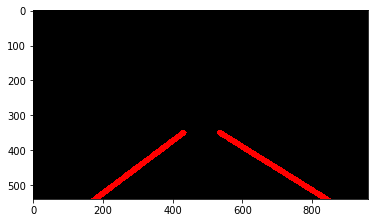

In [24]:
#Seperates array into left array and right array

left = np.empty((0,4),int)
right = np.empty((0,4),int)

for seperate in lines:
    for x1,y1,x2,y2 in seperate:
        if x2 <= 475:
            left = np.vstack([left,[x1,y1,x2,y2]])
        elif x2 >= 476:
            right = np.vstack([right,[x1,y1,x2,y2]])
            
# Finds slope of all lines
m_left = np.empty((0,1),int)
m_right = np.empty((0,1),int)
for grad in left:
    l = (grad[3]-grad[1])/(grad[2]-grad[0])
    m_left = np.vstack([m_left,[l]])
    
for grad in right:
    r = (grad[3]-grad[1])/(grad[2]-grad[0])
    m_right = np.vstack([m_right,[r]])

#Finds left y-intercept
x_left=(left[0:1,0:1])
y_left=(left[0:1,1:2])
m_ave_left = np.mean(m_left)
b_left = y_left - m_ave_left*x_left


#Finds right y-intercept
x_right=(right[0:1,0:1])
y_right=(right[0:1,1:2])
m_ave_right = np.mean(m_right)
b_right = y_right - m_ave_right*x_right

#Draws left line on line_image
x1_left_arr = (540-b_left)/(m_ave_left)
x1_left_scalar = int(np.asscalar(x1_left_arr))

x2_left_arr = (350-b_left)/(m_ave_left)
x2_left_scalar = int(np.asscalar(x2_left_arr))

cv2.line(line_image,(x1_left_scalar,545),(x2_left_scalar,350),(255,0,0),15)

#Draws right line on test_image
x1_right_arr = (540-b_right)/(m_ave_right)
x1_right_scalar = int(np.asscalar(x1_right_arr))

x2_right_arr = (350-b_right)/(m_ave_right)
x2_right_scalar = int(np.asscalar(x2_right_arr))


cv2.line(line_image,(x1_right_scalar,545),(x2_right_scalar,350),(255,0,0),15)

plt.imshow(line_image)


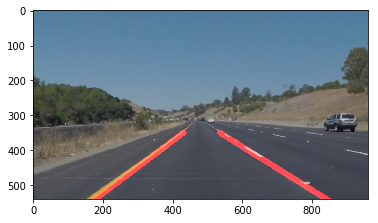

In [25]:
#Combines colors
color_edges = np.dstack((edges,edges,edges))

#Draw lines on edge image
lines_edges = cv2.addWeighted(image,0.8,line_image,1,0)
plt.imshow(lines_edges)
